# Análisis de Fase de Señales SPICE
Este notebook muestra cómo usar las funciones de `phase_analysis_utils.py` para cargar archivos SPICE y analizar diferencias de fase usando cruces al 50% (0.6 V).

In [1]:
from phase_analysis_utils import *

In [2]:
# Carga
time1, time2, time3, time4, vin1m, vin2m, vout1m, vout2m = load_spice_file("tb_QDLL_TOP_TT.txt")

# 1) Tiempo común (intersección)
time = common_time_vector(time1, time2, time3, time4, freq=200e6, n_per_period=500)

# 2) Remuestreo de cada señal a ese tiempo común
vin1  = resample_to_common_time(time, time1, vin1m)
vin2  = resample_to_common_time(time, time2, vin2m)
vout1 = resample_to_common_time(time, time3, vout1m)
vout2 = resample_to_common_time(time, time4, vout2m)


In [3]:
# Calcular diferencias de fase
results = analyze_signals(time, vin1, vin2, vout1, vout2)
for label, (phase, delay) in results.items():
    print(f"{label}: Fase = {phase:.2f}°, Retardo = {delay*1e9:.2f} ns")

phi_in: Fase = 90.00°, Retardo = 2.50 ns
phi_out: Fase = 88.77°, Retardo = 2.47 ns
phi_in_out: Fase = 47.12°, Retardo = 31.31 ns


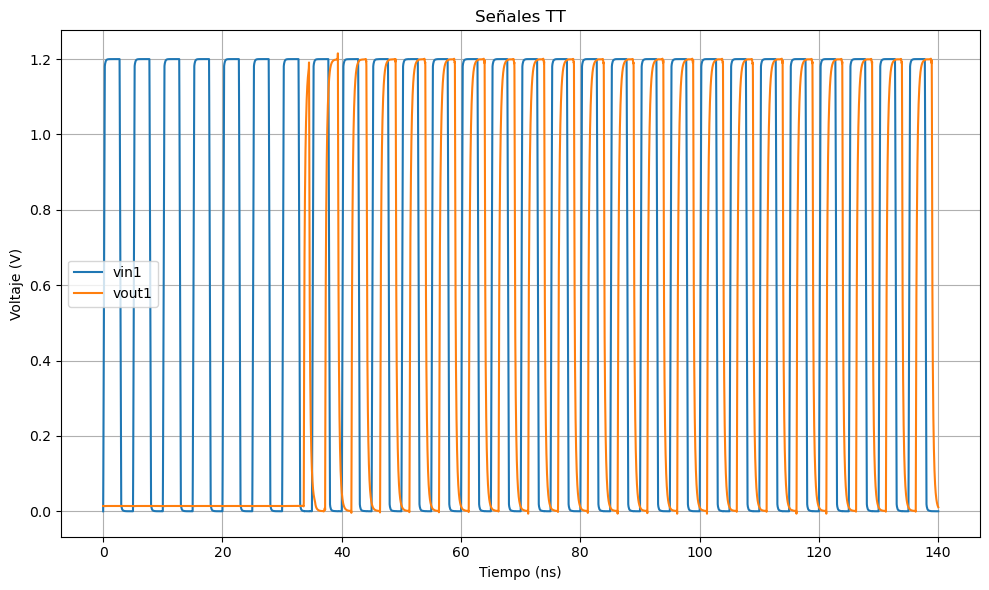

In [4]:
# Graficar las señales
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(time * 1e9, vin1, label='vin1')
#plt.plot(time * 1e9, vin2, label='vin2')
plt.plot(time * 1e9, vout1, label='vout1')
#plt.plot(time * 1e9, vout2, label='vout2')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Voltaje (V)')
plt.title('Señales TT')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

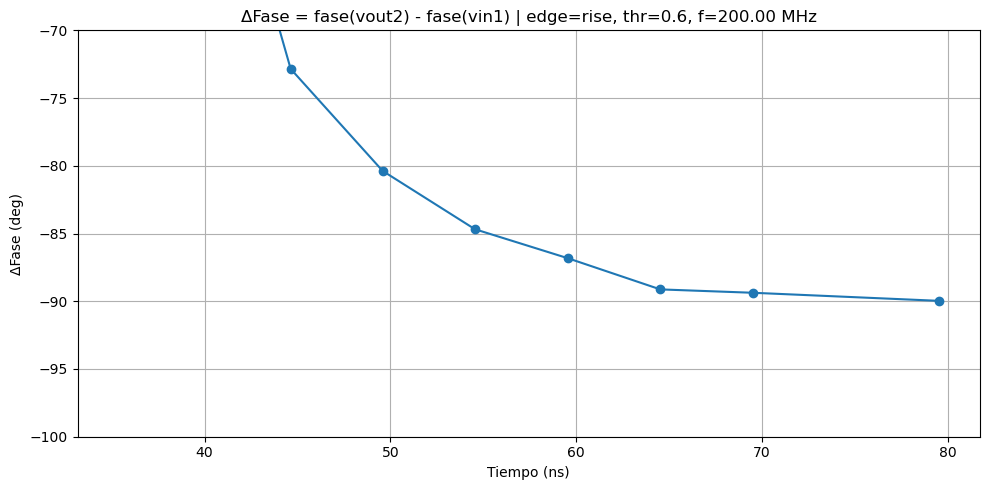

f = 199.99998304292149 MHz
Δphi = [ 33.63846109 -49.60207163 -72.84525299 -80.37651708 -84.68433393
 -86.8188713  -89.1241835  -89.37435166 -89.96951169] deg
Δphi medio = -67.68407029952535 deg
último punto Δphi a t = 79.5117565545057 ns


In [5]:
#time1, time2, time3, time4, vin1, vin2, vout1, vout2 = load_spice_file("tb_QDLL_TOP_TT.txt")

res = phase_and_difference(
    vin1, time,
    vout2, time,
    threshold=0.6,
    freq=None,      # o poné 200e6 si querés fijo
    edge="rise",
    ref="out",      # clave: que el eje temporal siga a la salida
    plot=True
)

print("f =", res["freq"]/1e6, "MHz")
print("Δphi =", res["dphi"], "deg")
print("Δphi medio =", res["mean_dphi"], "deg")
print("último punto Δphi a t =", res["t_axis"][-1]*1e9, "ns")


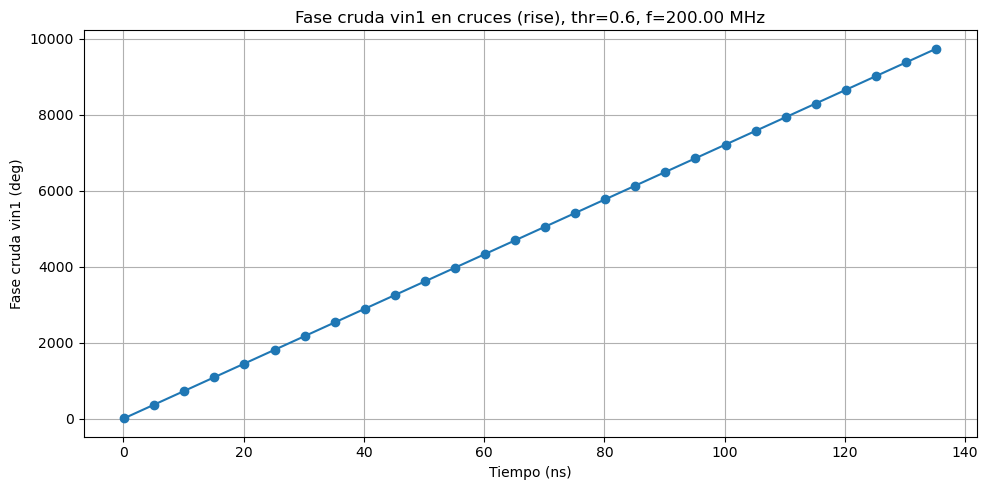

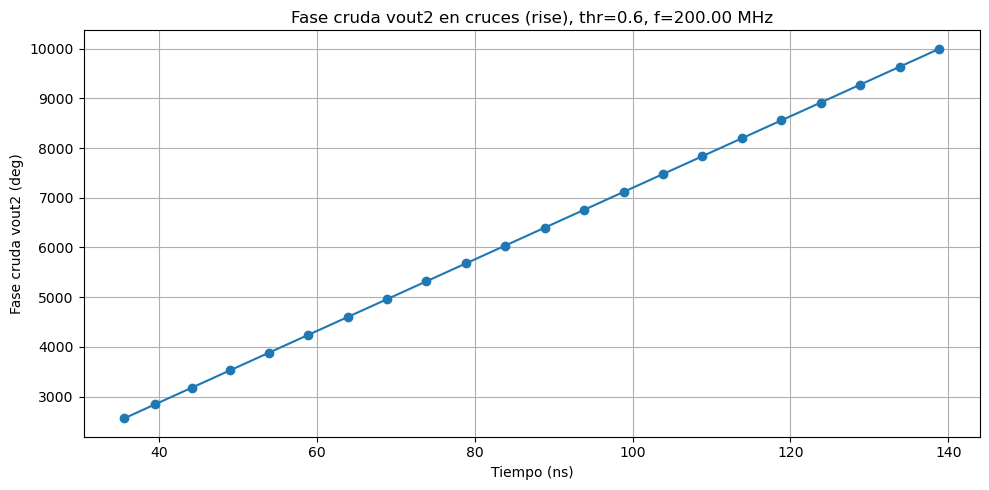

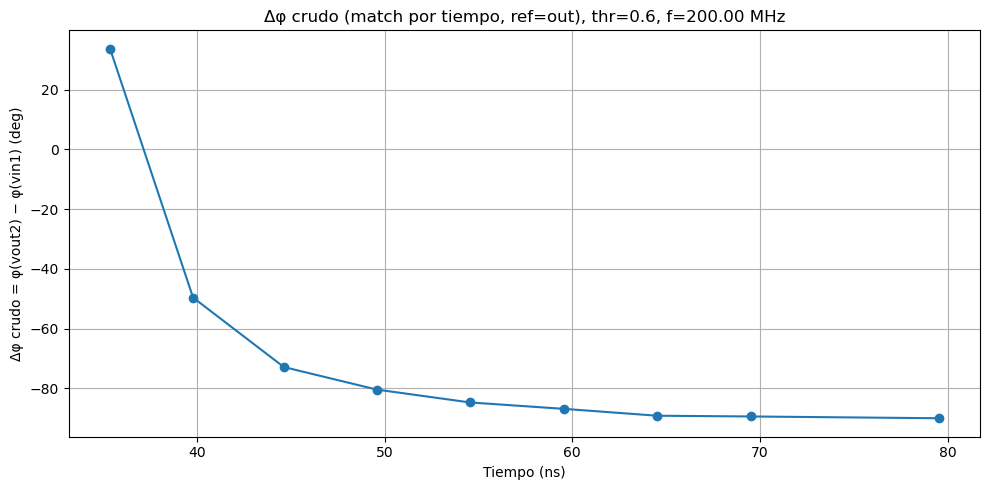

t1_fin [ns] = 140.0 | t2_fin [ns] = 140.0
N rises vin1 = 28 último [ns] = 135.13654614868162
N rises vout2= 22 último [ns] = 138.85478217700302
N pares Δφ  = 9 último t_axis [ns] = 79.5117565545057


In [6]:
(c_in, phi_in), (c_out, phi_out), (t_axis, dphi), f = plot_phi_crudo_y_delta(
    vin1, time,
    vout2, time,
    threshold=0.6,
    freq=None,      # o fijá 200e6 si querés
    edge="rise",
    ref="out"
)


### CORNERS

In [7]:
from phase_analysis_utils import *

# Cargar señales y tiempos para cada caso
t_ss, vin1_ss, _, vout1_ss, _ = load_spice_file("v1/tb_QDLL_TOP_SS.txt")
t_tt, vin1_tt, _, vout1_tt, _ = load_spice_file("v1/tb_QDLL_TOP_TT.txt")
t_ff, vin1_ff, _, vout1_ff, _ = load_spice_file("v1/tb_QDLL_TOP_FF.txt")

# Armar pares de señales (entrada-salida) y sus respectivos tiempos
signal_pairs = [(vin1_ss, vout1_ss), (vin1_tt, vout1_tt), (vin1_ff, vout1_ff)]
labels = ['SS', 'TT', 'FF']
time_arrays = [t_ss, t_tt, t_ff]

# Graficar diferencia de fase a lo largo del tiempo
compare_phase_vs_time_across_cases(signal_pairs, labels, time_arrays)



ValueError: too many values to unpack (expected 5)

In [ ]:
from phase_analysis_utils import *

# Calcular jitter
jitter_results = compare_jitter_across_cases(
    [vin1_ss, vin1_tt, vin1_ff],
    ['SS', 'TT', 'FF'],
    t_tt
)

for label, res in jitter_results.items():
    print(f"{label}: Jitter std = {res['jitter_std'] * 1e12:.2f} ps")


SS: Jitter std = 37.19 ps
TT: Jitter std = 0.02 ps
FF: Jitter std = 39.40 ps


In [ ]:
R = 2654*4
C = 2*600e-15
freq = 1/(2*np.pi*R*C)
print("freq: ", freq/(1e6), " MHz")

freq:  12.493323214322354  MHz
